# Proyek Klasifikasi Gambar Bahan Makanan

## Menyiapkan Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib

## Preprocessing Data

In [2]:
TRAINING_DIR = "dataset_1/train"
VALIDATION_DIR = "dataset_1/test"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    #horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))


Found 550 images belonging to 5 classes.


In [3]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(150, 150))


Found 122 images belonging to 5 classes.


## Membuat Model

In [4]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(150, 150, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output


C:\Users\favia\AppData\Local\Temp\ipykernel_6512\1528786134.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 3,293,093 (12.56 MB)

 Trainable params: 1,035,109 (3.95 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
int_lr = 1e-4
num_epochs = 30

optimizer = tf.optimizers.Adam(learning_rate=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Melatih Model

In [8]:
H = model.fit(train_generator,
              epochs=num_epochs,
              validation_data=validation_generator)


c:\Users\favia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


c:\Users\favia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 405ms/step - accuracy: 0.2034 - loss: 2.0272 - val_accuracy: 0.3525 - val_loss: 1.4947
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 333ms/step - accuracy: 0.3049 - loss: 1.5421 - val_accuracy: 0.5656 - val_loss: 1.2877
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 597ms/step - accuracy: 0.4448 - loss: 1.3121 - val_accuracy: 0.6885 - val_loss: 0.9419
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.5216 - loss: 1.1614 - val_accuracy: 0.7869 - val_loss: 0.7546
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.6376 - loss: 0.9179 - val_accuracy: 0.8525 - val_loss: 0.5595
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.6983 - loss: 0.7862 - val_accuracy: 0.8443 - val_loss: 0.4987
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.7549 - loss: 0.6400 - val_accuracy: 0.8607 - val_loss: 0.4462
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 311ms/step - accuracy: 0.8458 - loss: 0.4740 - val_accuracy: 0.8934 - va

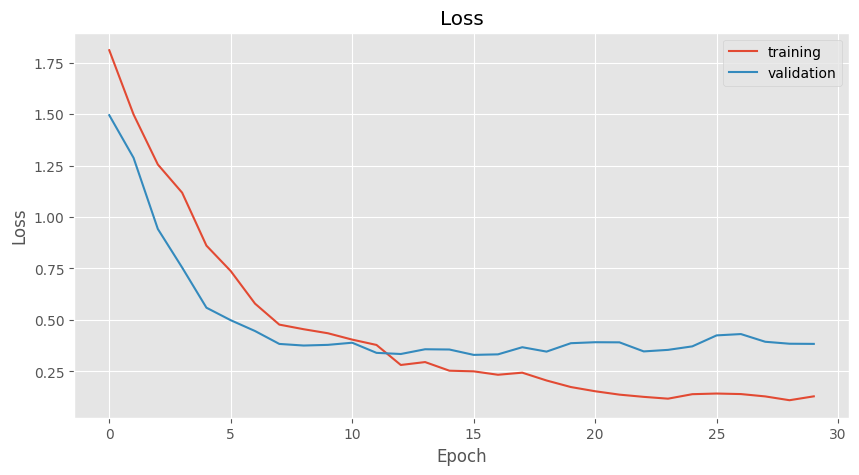

In [9]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


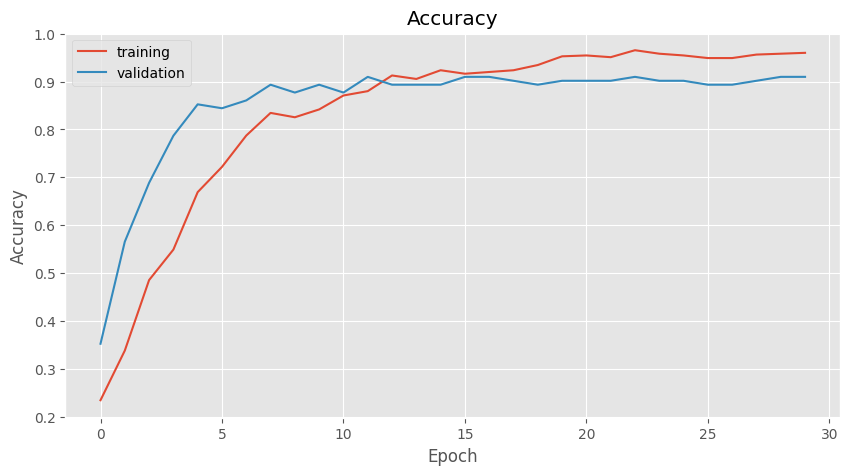

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


## Mengubah Model

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Add optimization options if needed
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# For quantization:
# converter.target_spec.supported_types = [tf.float16]  # For float16 quantization
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]  # For int8

tflite_model = converter.convert()

c:\Users\favia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


INFO:tensorflow:Assets written to: C:\Users\favia\AppData\Local\Temp\tmp4j_4x3ow\assets


INFO:tensorflow:Assets written to: C:\Users\favia\AppData\Local\Temp\tmp4j_4x3ow\assets


Saved artifact at 'C:\Users\favia\AppData\Local\Temp\tmp4j_4x3ow'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1624293593680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293592528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293595408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293595024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293593296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293595600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293594640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293593104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293595792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1624293592912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16242

In [22]:
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)


3542096